In [1]:
from pandas import read_excel
from pandas import DataFrame
from pandas import merge
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.mosaicplot import mosaic
from statsmodels.formula.api import logit

In [2]:
xlsx = read_excel('http://itpaper.co.kr/data/titanic.xlsx', engine='openpyxl')
xlsx

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic = xlsx.set_index('PassengerId')
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
titanic['Sex'] = titanic['Sex'].astype('category').cat.rename_categories({'male' : 1, 'female' : 0})
titanic['Survived'] = titanic['Survived'].astype('category')
titanic['Pclass'] = titanic['Pclass'].astype('category').cat.reorder_categories([1,2,3])
titanic['Embarked'] = titanic['Embarked'].astype('category').cat.rename_categories({'S':1, 'C':2, 'Q':3})

In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(4), float64(2), int64(2), object(3)
memory usage: 59.7+ KB


In [10]:
titanic.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
if 'Cabin' in titanic.columns:
    titanic.drop('Cabin', axis = 1, inplace = True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Embarked  889 non-null    category
dtypes: category(4), float64(2), int64(2), object(2)
memory usage: 52.7+ KB


In [12]:
most_frequent = titanic['Embarked'].mode()
most_frequent[0]

1

In [13]:
titanic['Embarked'].fillna(most_frequent[0], inplace = True)
titanic.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
dtype: int64

In [14]:
titanic['Age'].fillna(titanic['Age'].median(), inplace = True)
titanic.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [15]:
desc = titanic.describe()
desc

,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.361582,0.523008,0.381594,32.204208
std,13.019697,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [16]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False

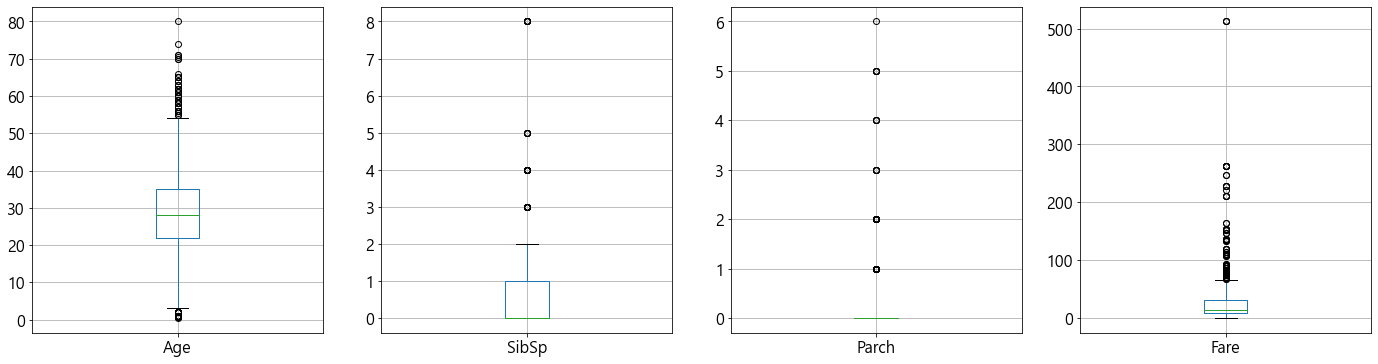

In [17]:
fig, ax = plt.subplots(1,4, figsize = (24,6))

for i,c in enumerate(desc.columns):
    titanic.boxplot(c, ax = ax[i])
plt.show()

### 티켓 가격별 승객 분포

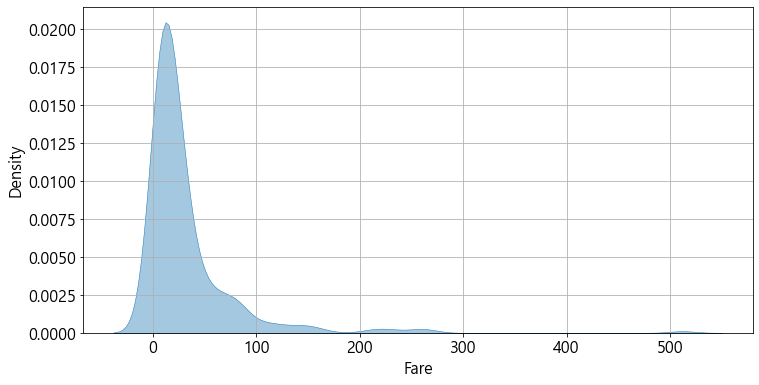

In [18]:
sns.kdeplot(data = titanic, x = 'Fare', fill=True, alpha = 0.4, linewidth=0.5)
plt.grid()
plt.show()

### 연령별 분포

대부분의 승객이 상대적으로 저렴한 50달러 미만의 티켓을 구입하여 승선한 것을 알 수 있다.

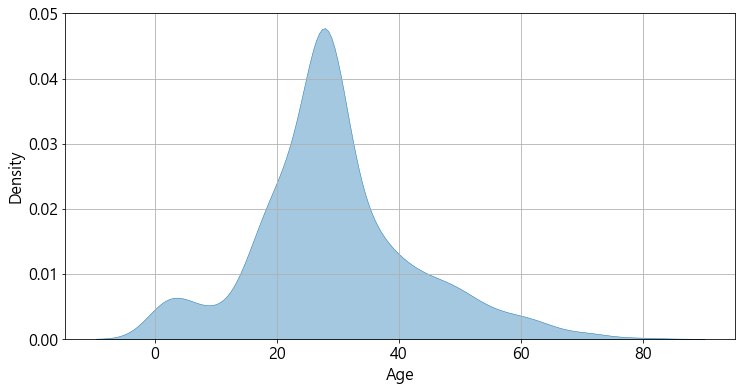

In [19]:
sns.kdeplot(data = titanic, x = 'Age', fill=True, alpha = 0.4, linewidth=0.5)
plt.grid()
plt.show()

30대가 가장 많은 것을 알 수 있다.

### 성별로 생존 여부에 따른 구성 분포

Text(0.5, 1.0, '티켓별로 생존 여부에 따른 구성 분포')

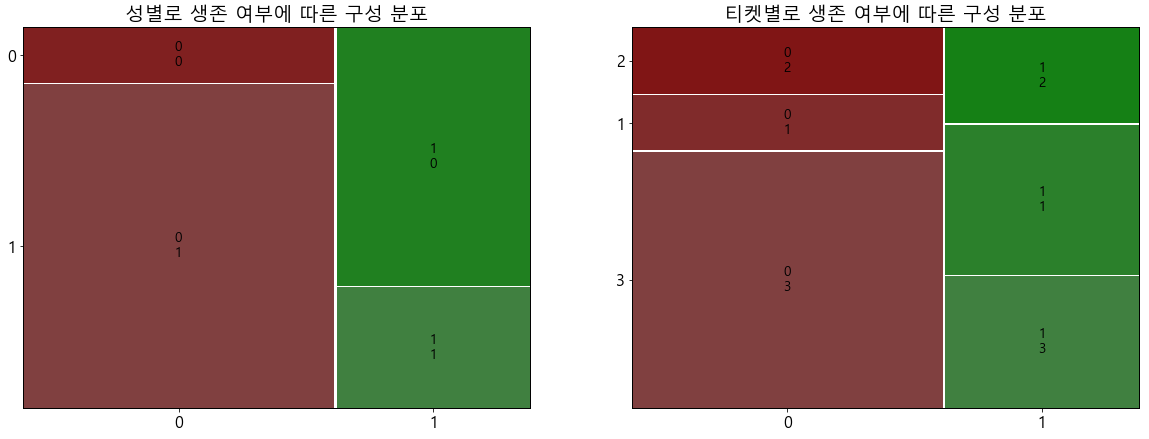

In [21]:
fig, ax = plt.subplots(1,2, figsize=(20,7))

mosaic(data = titanic, index = ['Survived', 'Sex'], ax = ax[0])
ax[0].set_title('성별로 생존 여부에 따른 구성 분포')

mosaic(data = titanic, index = ['Survived', 'Pclass'], ax = ax[1])
ax[1].set_title('티켓별로 생존 여부에 따른 구성 분포')

성별에 대해서는 여성의 생존률이 높은 것을 확인할 수 있다. 티켓 등급별의 경우 상대적으로 1등급 티켓 승객의 생존 비율이 높은 것을 볼 수 있다. 반면 생존하지 못한 승객의 대부분은 3등급 티켓으로 승선했음을 알 수 있다.

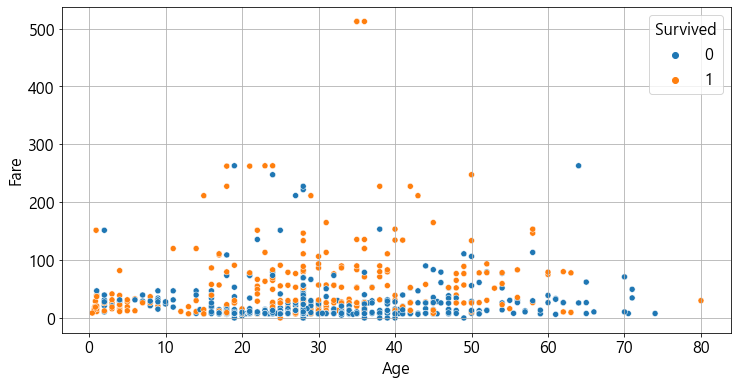

In [22]:
sns.scatterplot(data=titanic, x='Age', y='Fare', hue='Survived')
plt.grid()
plt.show()

객실 등급순으로 보면 1등급 승객의 생존 비율이 2,3 등급 객실 승객의 생존 비율보다 높다.

연령 비율로 보면 20대 이하, 특히 10대 미만의 어린이들의 생존비율이 가장 높다.

In [23]:
df = titanic.copy()
df['Survived'] = df['Survived'].astype('int64')
model = logit('Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked', data = df)
fit = model.fit()
print(fit.summary())

Optimization terminated successfully.
         Current function value: 0.440539
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      881
Method:                           MLE   Df Model:                            9
Date:                Mon, 21 Jun 2021   Pseudo R-squ.:                  0.3384
Time:                        15:01:09   Log-Likelihood:                -392.52
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 6.195e-81
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.0642      0.473      8.596      0.000       3.137       4.991
Pclass[T.2]      -0.

In [24]:
df = titanic.copy()
df['Survived']  = df['Survived'].astype('int64')
model = logit('Survived~Pclass+Sex+Age+SibSp+Parch+Fare', data=df)
fit = model.fit()
print(fit.summary())

Optimization terminated successfully.
         Current function value: 0.442813
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      883
Method:                           MLE   Df Model:                            7
Date:                Mon, 21 Jun 2021   Pseudo R-squ.:                  0.3350
Time:                        15:01:52   Log-Likelihood:                -394.55
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 7.950e-82
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.8110      0.443      8.596      0.000       2.942       4.680
Pclass[T.2]    -1.0119    

In [25]:
np.exp(fit.params)

Intercept      45.193590
Pclass[T.2]     0.363518
Pclass[T.3]     0.116259
Sex[T.1]        0.063390
Age             0.961597
SibSp           0.706057
Parch           0.897226
Fare            1.003023
dtype: float64

In [26]:
conf_tab = fit.pred_table()
conf_tab

array([[467.,  82.],
       [ 99., 243.]])

In [27]:
conf_df = DataFrame(conf_tab, 
                    index=['True','False'], 
                    columns=['Positive', 'Negative'])
conf_df

,Positive,Negative
True,467.0,82.0
False,99.0,243.0


In [28]:
k = (conf_df['Positive']['True']+conf_df['Negative']['False']) / len(df)
print('분류 정확도 :', k)

분류 정확도 : 0.7968574635241302


In [29]:
pred2 = fit.predict(df)
pred2

PassengerId
1      0.092196
2      0.899346
3      0.660337
4      0.904872
5      0.079753
         ...   
887    0.273390
888    0.959202
889    0.517088
890    0.531185
891    0.088738
Length: 891, dtype: float64

In [30]:
pdf = DataFrame(pred2, columns=['추정치'])
pdf['생존확률(%)'] = round(pdf['추정치']*100, 1)
pdf['예상결과'] = np.where(pdf['추정치'] > 0.5, "생존", "사망")

result_df = merge(df, pdf, left_index=True, right_index=True)
result_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,추정치,생존확률(%),예상결과
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,1,0.092196,9.2,사망
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0.899346,89.9,생존
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,1,0.660337,66.0,생존
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1,0.904872,90.5,생존
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,1,0.079753,8.0,사망
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,1,0.273390,27.3,사망
888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,1,0.959202,95.9,생존
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,1,0.517088,51.7,생존
